In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv('baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [4]:
df.shape

(1232, 15)

In [5]:
df.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [9]:
# df.boxplot()

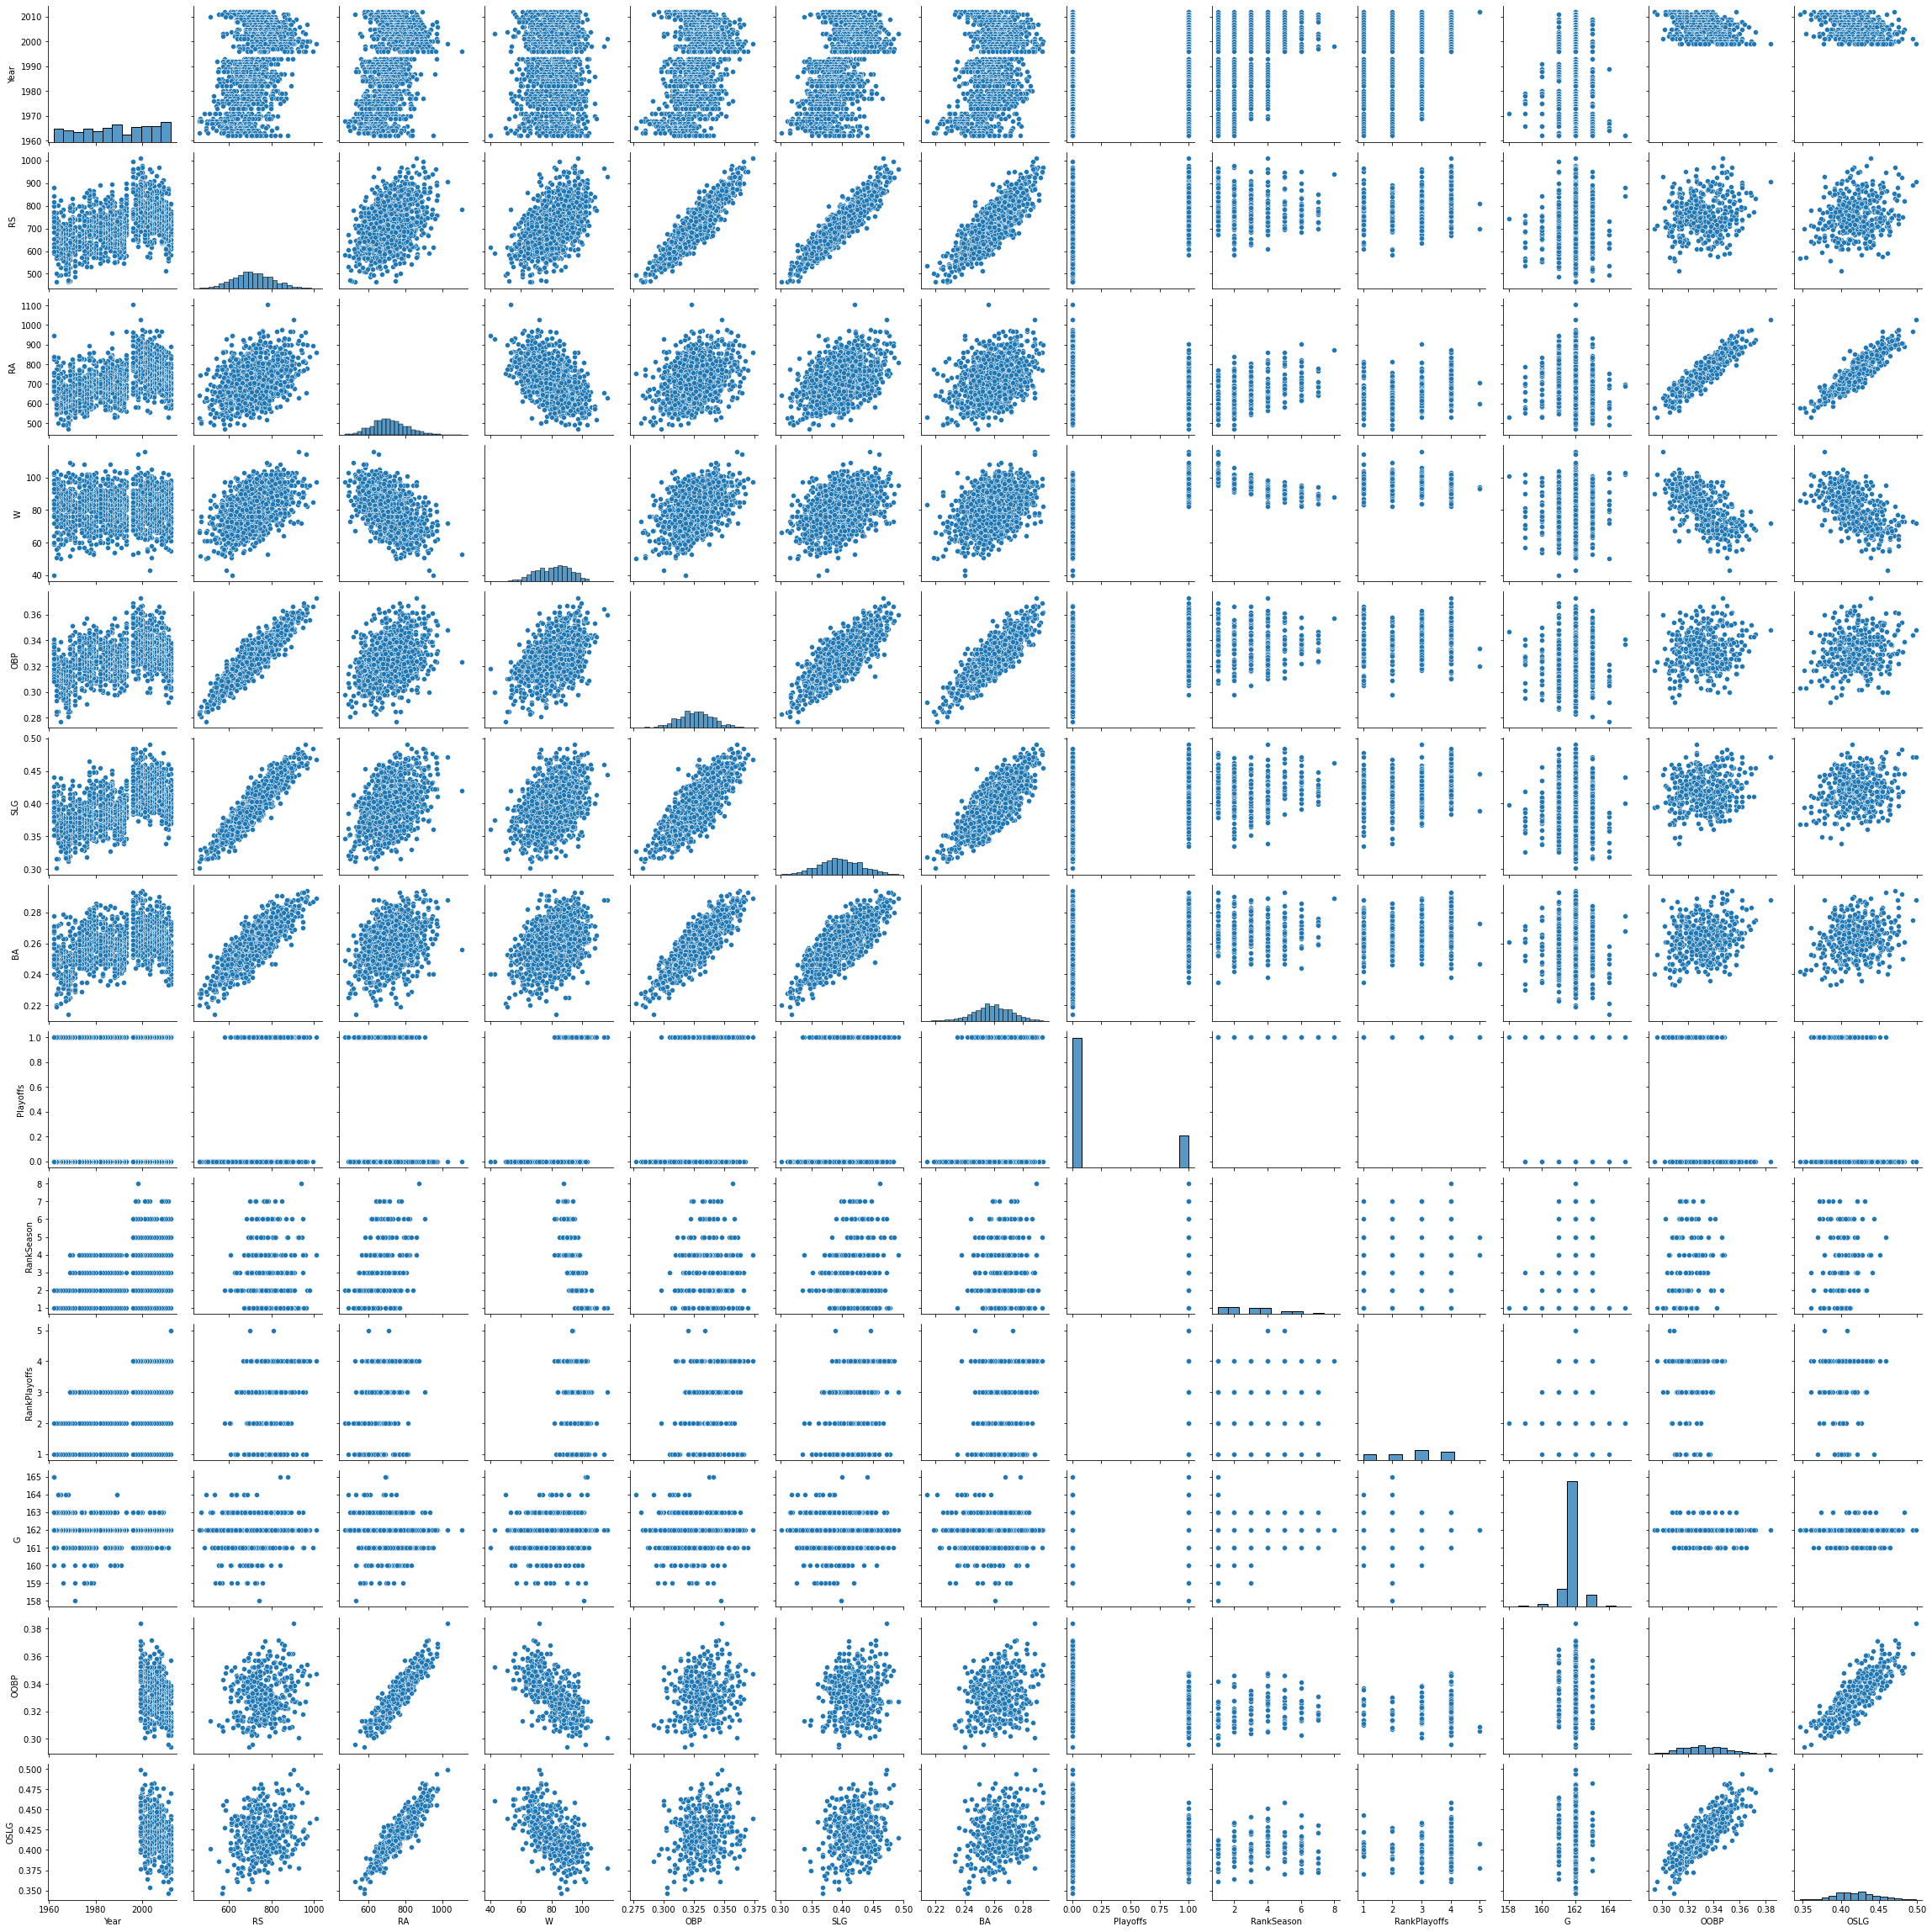

In [11]:
sns.pairplot(df)

<AxesSubplot:>

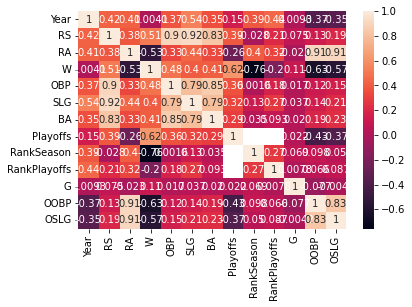

In [15]:
sns.heatmap(df.corr(),annot=True,linecolor='white')

In [16]:
df.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Year,1.000000,0.418978,0.412020,0.004138,0.374354,0.536037,0.349397,0.145779,0.385219,0.443967,0.009287,-0.371869,-0.345667
RS,0.418978,1.000000,0.380139,0.511745,0.900492,0.918740,0.827000,0.386628,-0.027687,0.210963,0.075195,0.133981,0.193426
RA,0.412020,0.380139,1.000000,-0.532394,0.326360,0.436527,0.330764,-0.261477,0.399141,0.315128,-0.023369,0.910344,0.909319
W,0.004138,0.511745,-0.532394,1.000000,0.481836,0.401496,0.408716,0.616757,-0.755098,-0.198960,0.105309,-0.634315,-0.568490
OBP,0.374354,0.900492,0.326360,0.481836,1.000000,0.790910,0.851958,0.363890,0.001612,0.175349,0.016563,0.120349,0.153372
SLG,0.536037,0.918740,0.436527,0.401496,0.790910,1.000000,0.790481,0.324713,0.126663,0.271893,0.036770,0.143861,0.210423
BA,0.349397,0.827000,0.330764,0.408716,0.851958,0.790481,1.000000,0.290217,0.035452,0.092684,0.019886,0.187108,0.227808
Playoffs,0.145779,0.386628,-0.261477,0.616757,0.363890,0.324713,0.290217,1.000000,NaN,NaN,0.022208,-0.433572,-0.366744
RankSeason,0.385219,-0.027687,0.399141,-0.755098,0.001612,0.126663,0.035452,NaN,1.000000,0.266906,0.069222,0.097731,0.050111
RankPlayoffs,0.443967,0.210963,0.315128,-0.198960,0.175349,0.271893,0.092684,NaN,0.266906,1.000000,0.007820,0.065808,0.087089


In [25]:
df['RD']=df['RS']-df['RA']
df.head()



,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [26]:
#To replicate the data prior to 2002 season
df1=df[df['Year']<2002]
df1.shape



(902, 16)

In [27]:
df_new=df1.drop(['Team','League','Year','Playoffs','RankSeason','RankPlayoffs'],axis=1)
df_new.head()

,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG,RD
330,691,730,75,0.327,0.405,0.261,162,0.331,0.412,-39
331,818,677,92,0.341,0.442,0.267,162,0.311,0.404,141
332,729,643,88,0.324,0.412,0.260,162,0.314,0.384,86
333,687,829,63,0.319,0.380,0.248,162,0.337,0.439,-142
334,772,745,82,0.334,0.439,0.266,161,0.329,0.393,27


In [44]:
df2=df_new.dropna()
df2.shape

(90, 10)

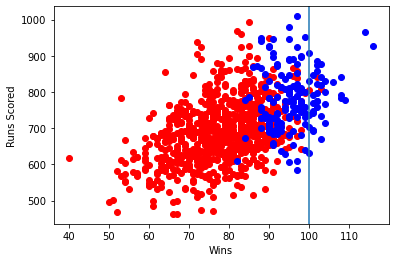

In [30]:
df_playoff=df1.groupby('Playoffs')
df_playoff_0=df_playoff.get_group(0)
df_playoff_1=df_playoff.get_group(1)
# Plotting scatterplotplt.
#figure(figsize=(10,8))
plt.scatter(x=df_playoff_0.W,y = df_playoff_0.RS,c="red")
plt.scatter(x=df_playoff_1.W,y = df_playoff_1.RS,c="blue")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 100)  #(requirement and score bw 850  to be in playoff)
# all the reds didnt enter playoffs and blue entered playoffs

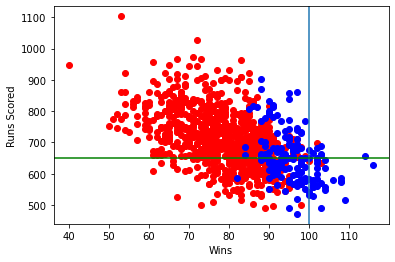

In [40]:
# Plot for opponent
plt.scatter(x=df_playoff_0.W,y = df_playoff_0.RA,c="red")
plt.scatter(x=df_playoff_1.W,y = df_playoff_1.RA,c="blue")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 100)
plt.axhline(y=650,color='g')
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression
# Extracting our variables from the dataframe.
x = df2[['OBP','SLG']].values
y = df2[['RS']].values# Calling our model object.
RS_model = LinearRegression()# Fitting the model.
RS_model.fit(x,y)

LinearRegression()

In [46]:
x = df2[['OOBP','OSLG']].values
y = df2[['RA']].values# Calling our model object.
RA_model = LinearRegression()# Fitting the model.
RA_model.fit(x,y)

LinearRegression()

In [47]:

x = df2[['RD']].values
y = df2[['W']].values# Calling our model object.
W_model = LinearRegression()# Fitting the model.
W_model.fit(x,y)

LinearRegression()

In [48]:
# info in production txt file
RS_model.predict([[0.339,0.430]])

array([[801.03832208]])

In [49]:
RA_model.predict([[.307,.373]])

array([[621.92581602]])

In [50]:
801.03832208-621.92581602

179.11250606

In [51]:
# Plug the above value in W_model
W_model.predict([[179.112]])
# 99 wins required to enter into playoffs

array([[98.6883173]])